In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
X = df.drop('class', axis=1)
y = df['class']

In [5]:
min_max_scaler = MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

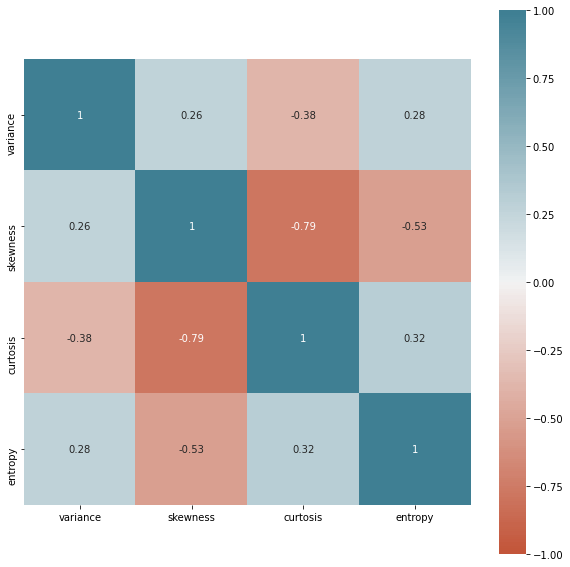

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
corr = X.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax, annot=True)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [21]:
model.compile(optimizer='adam',
              loss=losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

In [22]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 745us/step - loss: 0.6854 - binary_accuracy: 0.5570
Epoch 2/100
30/30 [==============================] - 0s 828us/step - loss: 0.6771 - binary_accuracy: 0.5570
Epoch 3/100
30/30 [==============================] - 0s 754us/step - loss: 0.6672 - binary_accuracy: 0.5571
Epoch 4/100
30/30 [==============================] - 0s 816us/step - loss: 0.6495 - binary_accuracy: 0.5458
Epoch 5/100
30/30 [==============================] - 0s 861us/step - loss: 0.6338 - binary_accuracy: 0.5635
Epoch 6/100
30/30 [==============================] - 0s 825us/step - loss: 0.6196 - binary_accuracy: 0.5989
Epoch 7/100
30/30 [==============================] - 0s 856us/step - loss: 0.6088 - binary_accuracy: 0.6444
Epoch 8/100
30/30 [==============================] - 0s 856us/step - loss: 0.5981 - binary_accuracy: 0.6373
Epoch 9/100
30/30 [==============================] - 0s 852us/step - loss: 0.5769 - binary_accuracy: 0.6327
Epoch 10/100
30/30 [========

30/30 [==============================] - 0s 899us/step - loss: 0.1147 - binary_accuracy: 0.9716
Epoch 76/100
30/30 [==============================] - 0s 842us/step - loss: 0.1066 - binary_accuracy: 0.9760
Epoch 77/100
30/30 [==============================] - 0s 847us/step - loss: 0.1148 - binary_accuracy: 0.9720
Epoch 78/100
30/30 [==============================] - 0s 901us/step - loss: 0.1203 - binary_accuracy: 0.9722
Epoch 79/100
30/30 [==============================] - 0s 873us/step - loss: 0.1229 - binary_accuracy: 0.9644
Epoch 80/100
30/30 [==============================] - 0s 789us/step - loss: 0.1136 - binary_accuracy: 0.9727
Epoch 81/100
30/30 [==============================] - 0s 836us/step - loss: 0.1158 - binary_accuracy: 0.9598
Epoch 82/100
30/30 [==============================] - 0s 854us/step - loss: 0.1118 - binary_accuracy: 0.9674
Epoch 83/100
30/30 [==============================] - 0s 813us/step - loss: 0.1022 - binary_accuracy: 0.9734
Epoch 84/100
30/30 [============

In [13]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

13/13 - 0s - loss: 0.0122 - binary_accuracy: 1.0000
Loss:  0.012161078862845898
Accuracy:  1.0


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy'])

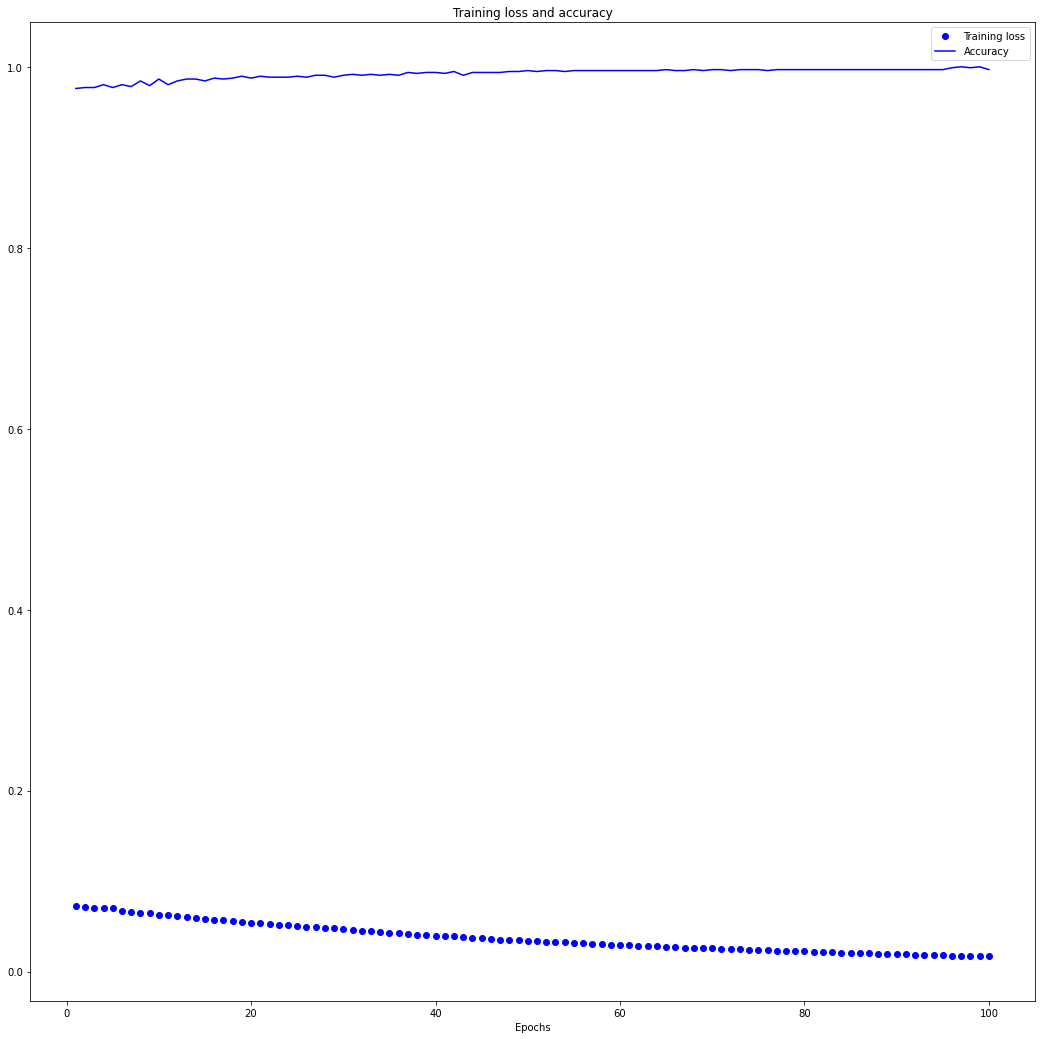

In [15]:
acc = history_dict['binary_accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(18,18))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()